In [2]:
import pandas as pd
import numpy as np

# Load raw anemia data
df = pd.read_csv("../data/raw/anemia_raw.csv")
df.head()



,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(887)

In [5]:
df = df.drop_duplicates()
df.shape

(534, 6)

In [6]:
df['Result'].value_counts()
df['Result'].value_counts(normalize=True) * 100

Result
0    53.745318
1    46.254682
Name: proportion, dtype: float64

In [7]:
numeric_cols = ["Hemoglobin", "MCH", "MCHC", "MCV"]

df[numeric_cols].describe()

,Hemoglobin,MCH,MCHC,MCV
count,534.000000,534.000000,534.000000,534.000000
mean,13.287079,22.911985,30.249438,85.647004
std,2.066276,3.948482,1.412312,9.604934
min,6.600000,16.000000,27.800000,69.400000
25%,11.600000,19.500000,29.000000,77.325000
50%,13.100000,22.750000,30.400000,85.450000
75%,14.975000,26.100000,31.475000,94.150000
max,16.900000,30.000000,32.500000,101.600000


In [8]:
df.to_csv("../data/processed/anemia_clean.csv", index=False)
print("Clean file saved successfully!")

Clean file saved successfully!


In [9]:
df.to_csv("../data/processed/anemia_clean.csv", index=False)

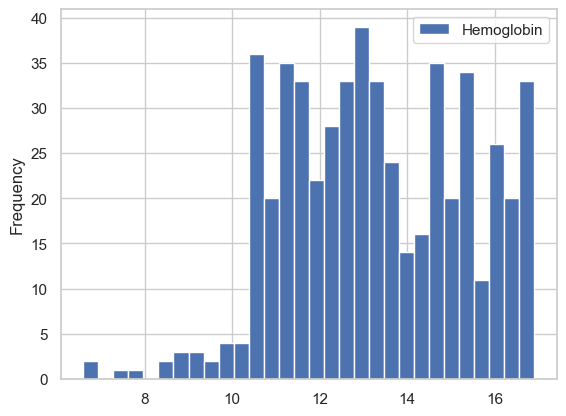

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Example plot (you can change later)
df[['Hemoglobin']].plot(kind='hist', bins=30)
plt.show()

In [15]:
df = pd.read_csv("../data/processed/anemia_clean.csv")
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


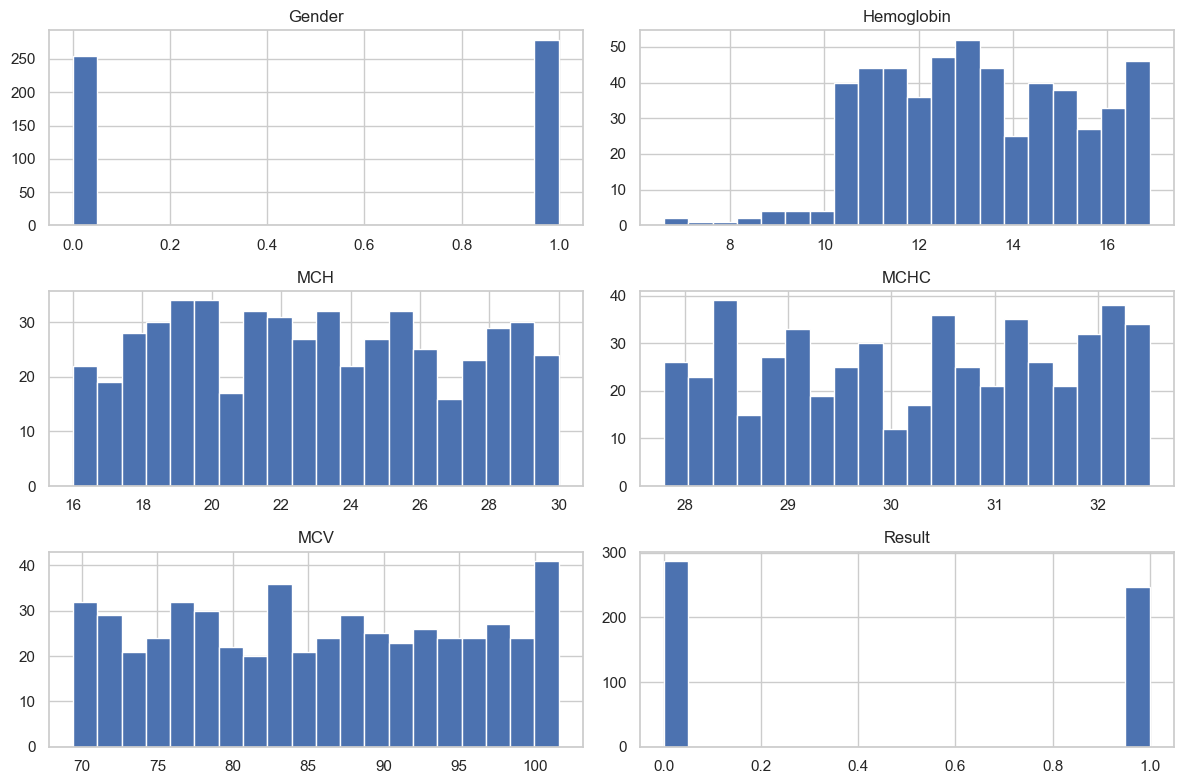

In [16]:
df.hist(figsize=(12,8), bins=20)
plt.tight_layout()
plt.show()

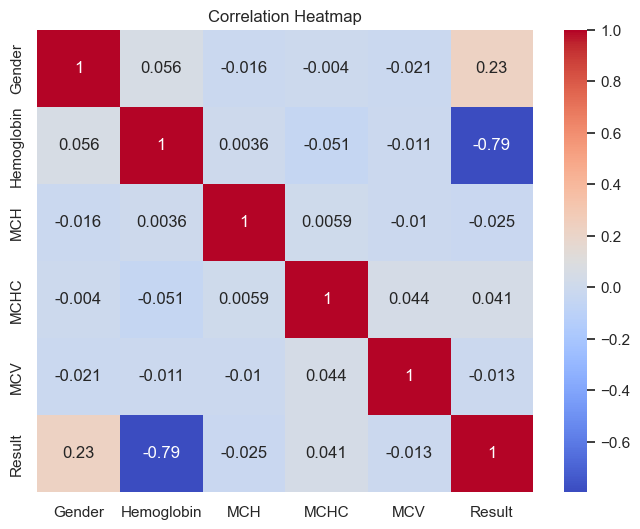

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

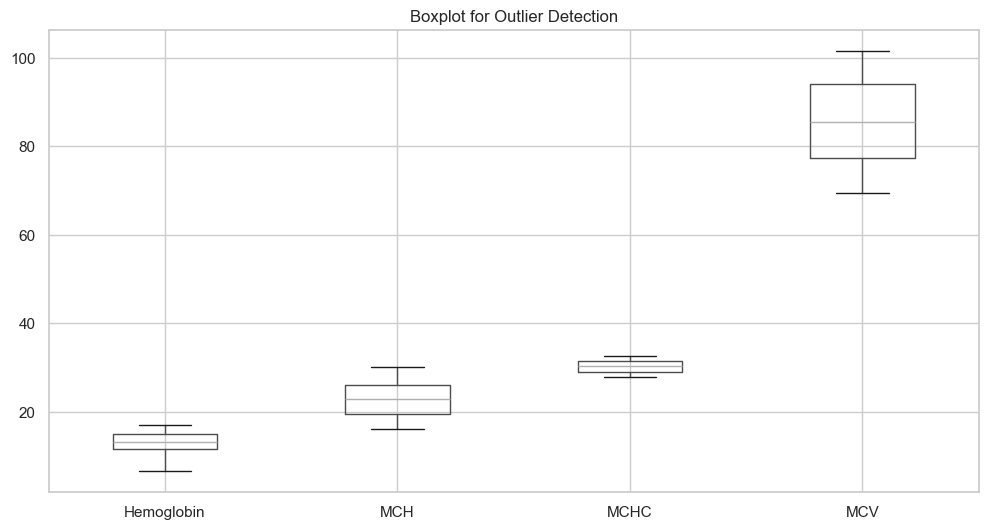

In [18]:
numeric_cols = ["Hemoglobin", "MCH", "MCHC", "MCV"]

plt.figure(figsize=(12,6))
df[numeric_cols].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.show()

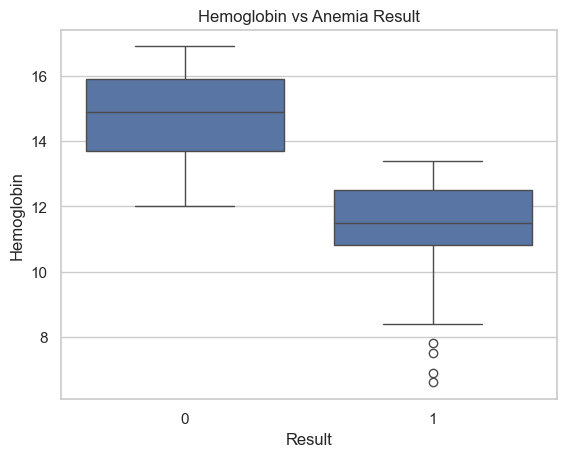

In [19]:
sns.boxplot(x="Result", y="Hemoglobin", data=df)
plt.title("Hemoglobin vs Anemia Result")
plt.show()

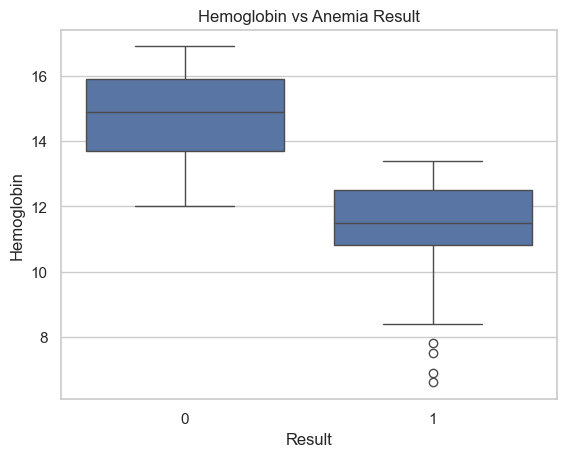

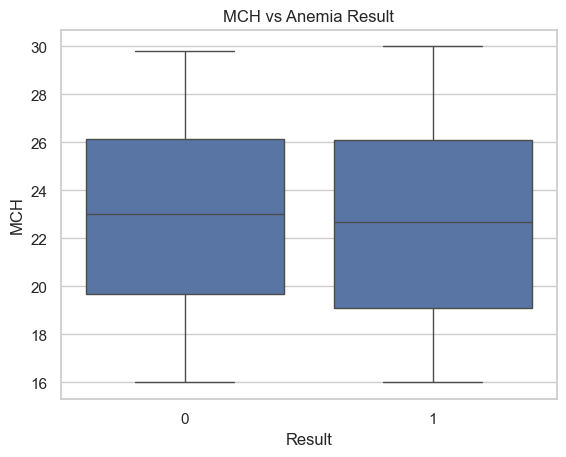

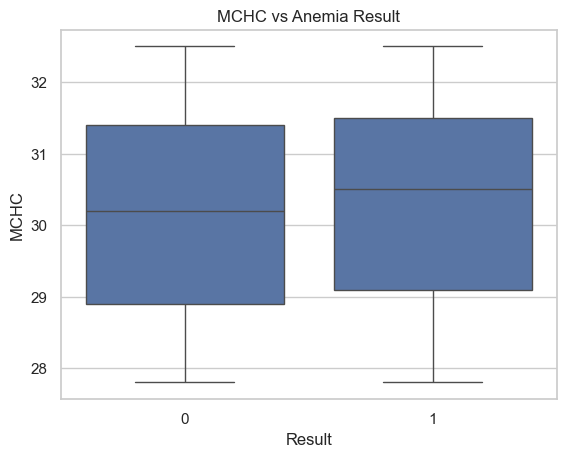

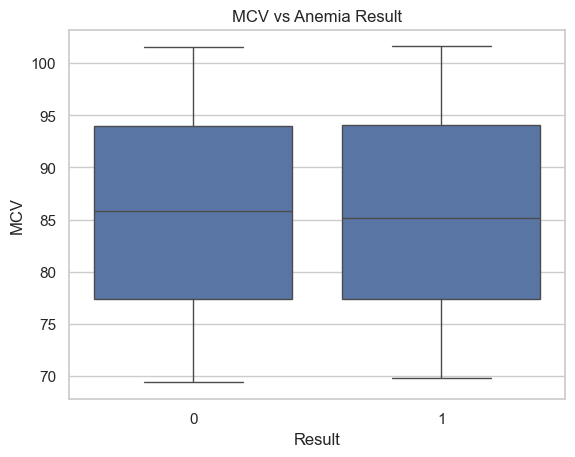

In [20]:
for col in numeric_cols:
    sns.boxplot(x="Result", y=col, data=df)
    plt.title(f"{col} vs Anemia Result")
    plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,0.781325,-0.053738,-0.814633,-0.202899,0
1,0,1.265742,0.630710,-1.381611,-1.422165,0
2,0,-2.076731,-0.357937,-0.460272,-1.505533,1
3,0,0.781325,-1.752184,0.815429,0.193102,0
4,1,0.684442,-0.231188,-1.452484,1.443631,0


In [22]:
from sklearn.model_selection import train_test_split

X = df[numeric_cols]
y = df["Result"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((427, 4), (107, 4))

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [24]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

In [25]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [26]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

In [27]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/72.0 MB 837.8 kB/s eta 0:01:26
   ---------------------------------------- 0.4/72.0 MB 2.1 MB/s eta 0:00:34
   ---------------------------------------- 0.8/72.0 MB 4.2 MB/s eta 0:00:17
   ---------------------------------------- 0.8/72.0 MB 4.2 MB/s eta 0:00:17
    --------------------------------------- 1.0/72.0 MB 3.4 MB/s eta 0:00:22
    --------------------------------------- 1.0/72.0 MB 3.2 MB/s eta 0:00:23
    --------------------------------------- 1.1/72.0 MB 3.1 MB/s eta 0:00:24
    --------------------------------------- 1.1/72.0 MB 2.8 MB/s eta 0:00:26
    --------------------------------------- 1.2/72.0 MB 2.6 MB/s eta 0:00:28
    --------------------------------------- 1.2/72.0 MB 2.5 MB/s eta 0:00:29
    --------------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

In [30]:
def evaluate_model(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

Logistic Regression Results:
Accuracy: 0.9065
Precision: 0.8824
Recall: 0.9184
F1 Score: 0.9000


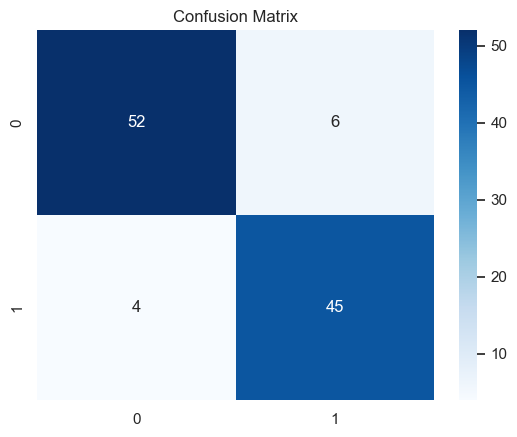

In [31]:
print("Logistic Regression Results:")
evaluate_model(y_test, y_pred_lr)

Random Forest Results:
Accuracy: 0.8692
Precision: 0.7966
Recall: 0.9592
F1 Score: 0.8704


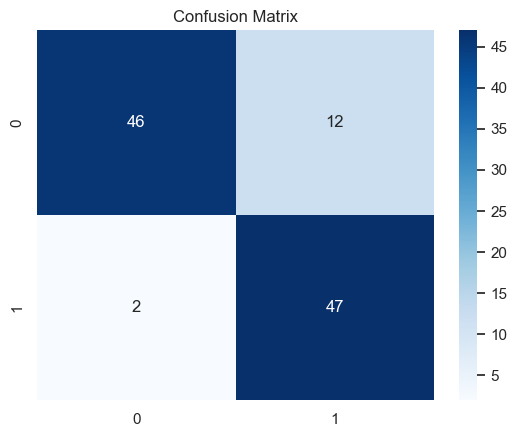

In [32]:
print("Random Forest Results:")
evaluate_model(y_test, y_pred_rf)

SVM Results:
Accuracy: 0.8785
Precision: 0.8462
Recall: 0.8980
F1 Score: 0.8713


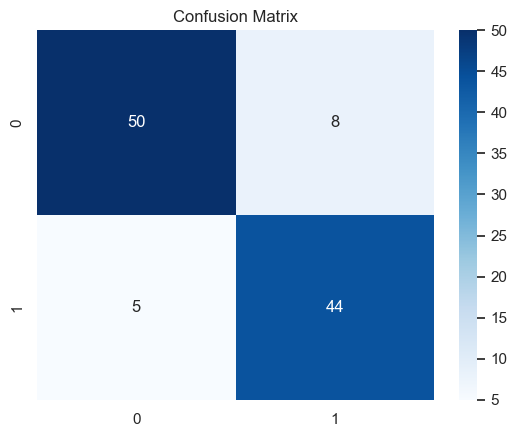

In [33]:
print("SVM Results:")
evaluate_model(y_test, y_pred_svm)

XGBoost Results:
Accuracy: 0.8972
Precision: 0.8654
Recall: 0.9184
F1 Score: 0.8911


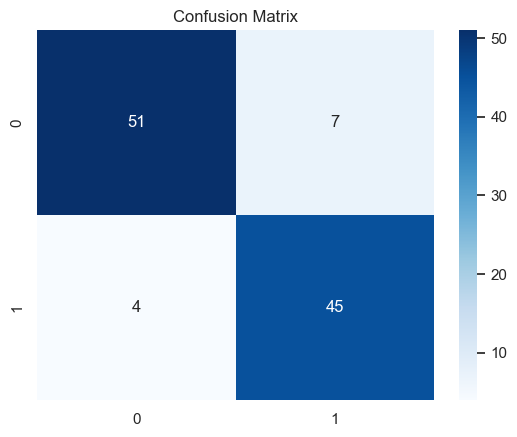

In [34]:
print("XGBoost Results:")
evaluate_model(y_test, y_pred_xgb)

In [35]:
import pickle
import os

# Create directory if not exists
os.makedirs("../models_saved", exist_ok=True)

# Save the best model (XGBoost)
model_path = "../models_saved/anemia_xgboost.pkl"
with open(model_path, "wb") as f:
    pickle.dump(xgb, f)

print("Model saved at:", model_path)

Model saved at: ../models_saved/anemia_xgboost.pkl


In [36]:
# Save the scaler
scaler_path = "../models_saved/anemia_scaler.pkl"
with open(scaler_path, "wb") as f:
    pickle.dump(scaler, f)

print("Scaler saved at:", scaler_path)

Scaler saved at: ../models_saved/anemia_scaler.pkl


<Figure size 800x600 with 0 Axes>

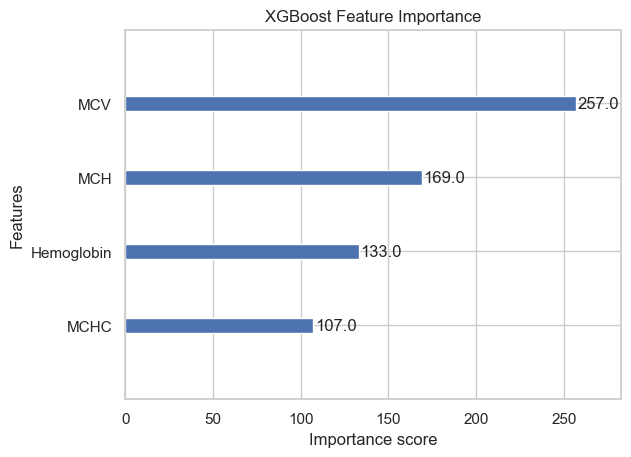

In [37]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
import os

# Create folder if not exists
os.makedirs("../visualizations/anemia", exist_ok=True)

plt.figure(figsize=(8,6))
plot_importance(xgb)
plt.title("XGBoost Feature Importance")
plt.savefig("../visualizations/anemia/feature_importance.png")
plt.show()

In [38]:
pip install shap

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ----- ---------------------------------- 71.7/548.0 kB 2.0 MB/s eta 0:00:01
   ------------------------ --------------- 337.9/548.0 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------  542.7/548.0 kB 4.9 MB/s eta 0:00:01
   ---------------------------------------  542.7/548.0 kB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 548.0/548.0 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------- ----------------------------- 0.7/2.7 MB 42.9 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.7 MB 15.0 MB/s eta 0:00:01
   ----------- ---------------------------- 0.8/2.7 MB 6.1 MB/s eta 0:00:01
   ------------ --------------------------- 0.8/2.7 MB 4.8 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.7 MB 3.9 MB/s eta 0:00:01
   ------------- -


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


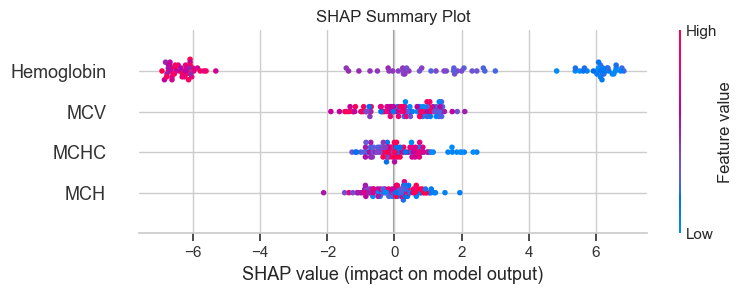

In [39]:
import shap

# Initialize SHAP
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Summary plot
plt.title("SHAP Summary Plot")
shap.summary_plot(shap_values, X_test, show=False)
plt.savefig("../visualizations/anemia/shap_summary.png")
plt.show()

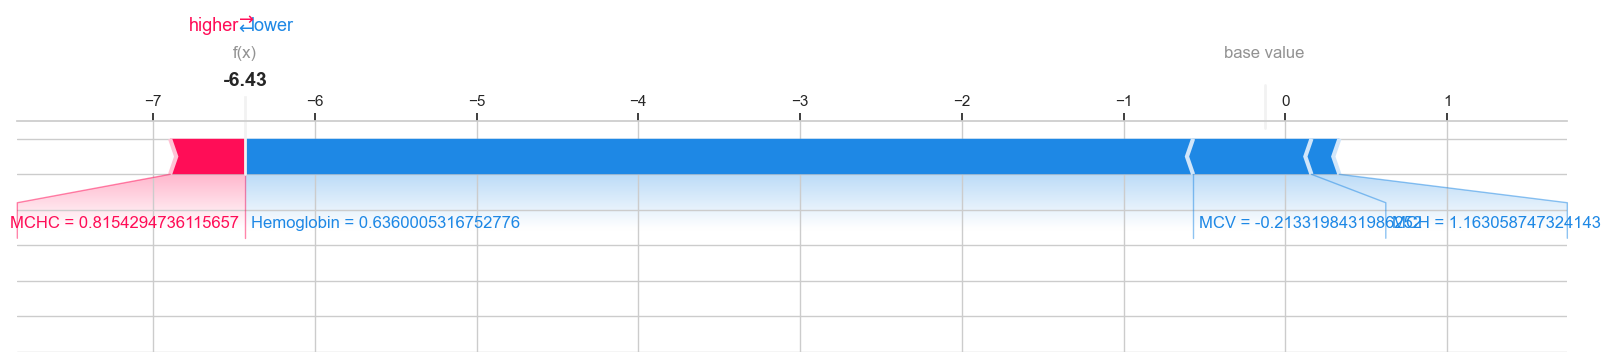

<Figure size 640x480 with 0 Axes>

In [40]:
i = 0  # choose a test sample

shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X_test.iloc[i],
    matplotlib=True
)
plt.savefig("../visualizations/anemia/shap_force_plot.png")
plt.show()

In [41]:
# Save SHAP beeswarm plots separately
features = ["Hemoglobin", "MCV", "MCHC", "MCH"]

for i, col in enumerate(features):
    plt.figure(figsize=(8, 4))
    shap.dependence_plot(i, shap_values, X_test, feature_names=features, show=False)
    plt.title(f"SHAP Dependence Plot – {col}")
    plt.savefig(f"../visualizations/anemia/shap_{col}.png")
    plt.close()

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>